<a href="https://colab.research.google.com/github/SUBHADEEP1710/Credit-Card-Transaction-Fraud-Detection/blob/master/Credit_Card_Fraud_Transac_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fraud-detection.zip

Archive:  fraud-detection.zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('fraudTrain.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
df.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [ ]:
data = df.head(n = 20000)
data.is_fraud.value_counts()

is_fraud
0    19850
1      150
Name: count, dtype: int64

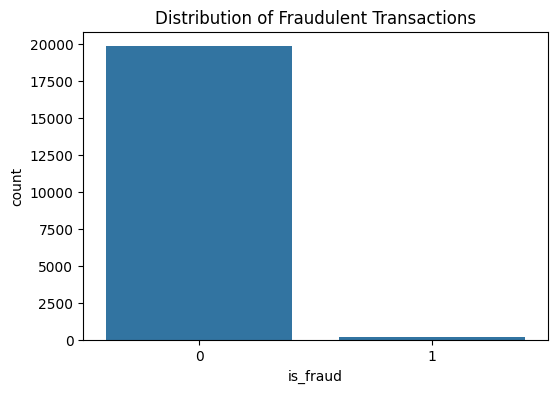

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [ ]:
df_processed = pd.get_dummies(data=data)
df_processed.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,...,False,False,False,False,False,False,False,False,False,False
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,...,False,False,False,False,False,False,False,False,False,False
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,...,False,False,False,False,False,False,False,False,False,False
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_train = df_processed.drop(columns='is_fraud', axis=1)
y_train = df_processed['is_fraud']

In [ ]:
df_test = pd.read_csv("fraudTest.csv")
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_test.drop(columns=["Unnamed: 0", "trans_num", "street"], inplace= True)
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [ ]:
data_test = df_test.sample(frac=1, random_state=1).reset_index()
data_test = data_test.head(n = 5000)
data_test.is_fraud.value_counts()

is_fraud
0    4979
1      21
Name: count, dtype: int64

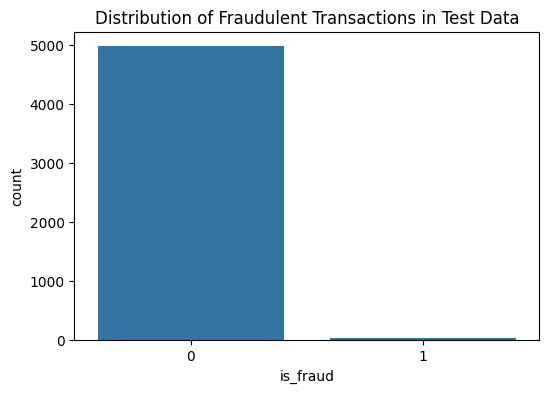

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data_test)
plt.title('Distribution of Fraudulent Transactions in Test Data')
plt.show()

In [ ]:
df_processed_test = pd.get_dummies(data=data_test)
df_processed_test.head()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,dob_2001-07-10,dob_2001-07-26,dob_2001-12-19,dob_2003-05-07,dob_2003-09-14,dob_2004-03-18,dob_2004-05-08,dob_2004-06-19,dob_2004-12-30,dob_2005-01-29
0,207181,4229733778084049,41.17,42701,37.6848,-85.8784,48194,1378054835,38.370429,-86.671765,...,False,False,False,False,False,False,False,False,False,False
1,501018,4223708906367574214,51.89,45051,39.0965,-84.6431,177,1387521110,39.090859,-84.115650,...,False,False,False,False,False,False,False,False,False,False
2,312515,30175986190993,2.22,56592,47.5375,-95.9941,516,1382090733,47.285136,-96.180797,...,False,False,False,False,False,False,False,False,False,False
3,407433,675909898057,87.21,10504,41.1360,-73.7009,7987,1385702190,41.503596,-73.220229,...,False,False,False,False,False,False,False,False,False,False
4,386454,30092964733035,79.78,41056,38.6207,-83.8067,14228,1384849723,39.043199,-83.842076,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_test = df_processed.drop(columns='is_fraud', axis=1)
y_test = df_processed['is_fraud']

In [ ]:
LR = LogisticRegression(solver='liblinear')

LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = LR.predict(x_test)


In [ ]:
predict_proba = LR.predict_proba(x_test)

In [ ]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

print(f"Logistic Regression Accuracy Score: {LR_Accuracy_Score}")

Logistic Regression Accuracy Score: 0.9925


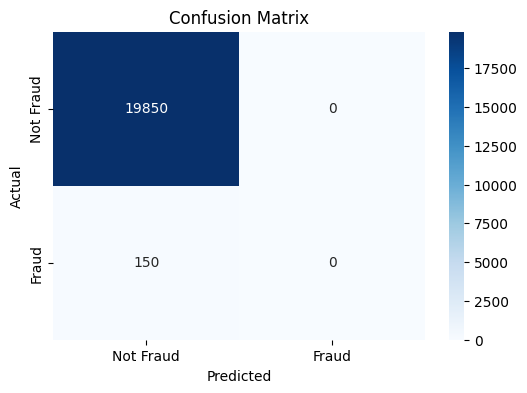

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

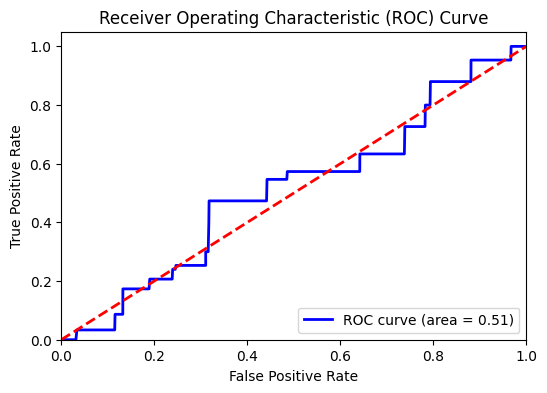

In [ ]:
# ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test, predict_proba[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()